# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [1]:
# Lets start oour project with Mounting the data to drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Importing necessary Libraries and importing Data(Seol Data)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#This is just importing necessary libraries

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter Capstone projects/project-2 Supervised ML/SeoulBikeData.csv',encoding='ISO-8859-1')

In [5]:
# This will show us the first 5 observations of our data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.shape

(8760, 14)

#### So, The data contains 14 variables/features and 8760 observations.

In [7]:
# This part of the code gives us last 5 observations of the DataFrame.
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Step 1. **Exploratory Data Analysis on the Data**

#### Let's see What the data has to offer!!

In [8]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [9]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### df.describe() gives us the Statistics of the whole dataset. The Statisics include total Count, Mean,Standard Deviation, Interquartile ranges,median etc.

#### Checking for null values

In [10]:
# THis gives us the total count of null values in all of the features.
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Thankfully there are no null values, which spares us some time.

### Let's see if there are any correlations between the variables in the dataset

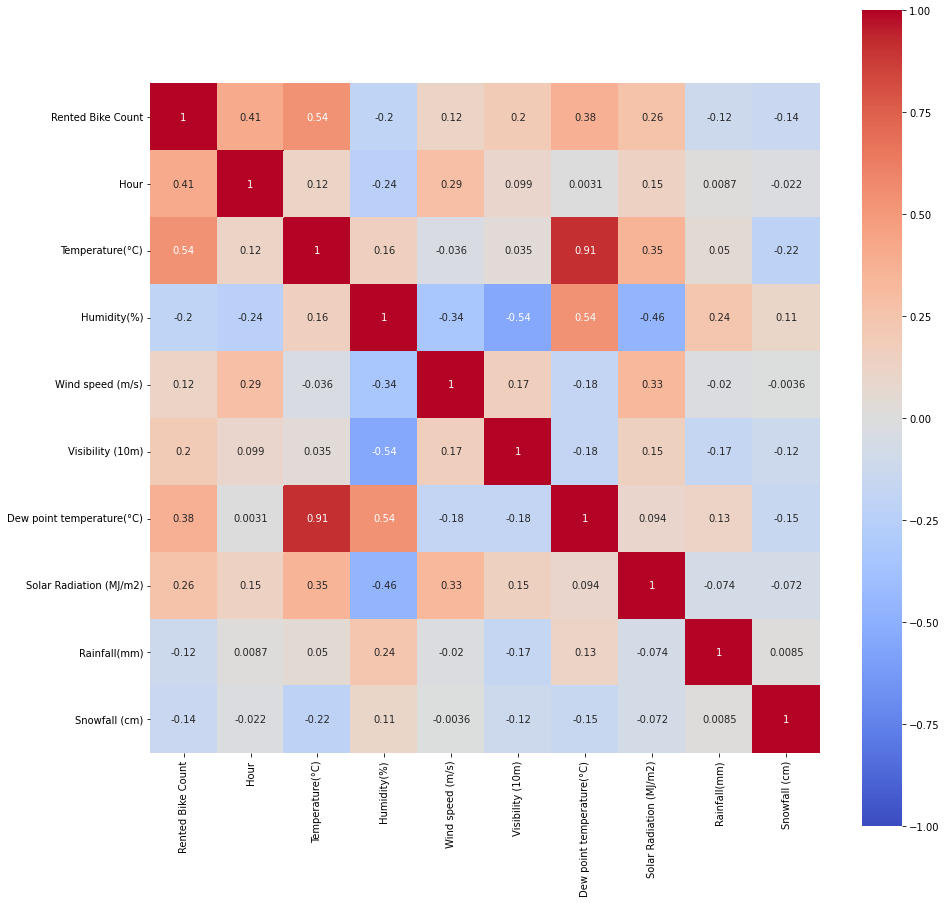

In [11]:
# let's plot correlations inbetween the variables.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);



#### As it could be seen there are very few correlations between the variables, but there is a significant correlation between Temperature and Dew Temperature point. So, we will have to remove Temperature or Dew Temperature Point , and in this case it is more sensible to remove Dew temperature point.

In [12]:
# dropping the variable coz it has a lot of correlation with Temperature.
df.drop(columns=['Dew point temperature(°C)'], inplace=True)

#### We also see that there is a bit of correlation between Temperature and Rented bike counter. And also Hour and Rented Bike Counter (0.53 and 0.41 Respectively) Which could be ignored.


### Let's start Visualizations and Pre Processing.

#### let's create some new variables , 
####1. Variables that tell us if it is a day or night.

In [13]:
df['day_or_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

#### 2. Variable that tell us which day of the week it is and also the month

In [14]:
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['WeekDay']=df["Date"].dt.day_name() 

In [15]:
df['Month']=df['Date'].dt.month

### Lets plot the date vs the target(Rented Bike Count)

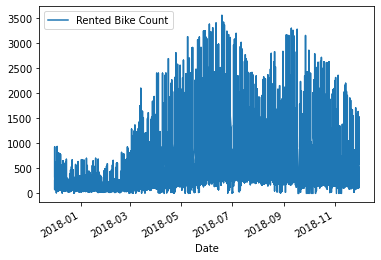

In [16]:
df.plot(x='Date',y='Rented Bike Count',kind='line')

#### So, The number of Rented bikes increase from the month of april to june that is the weather of summers.

In [17]:
df_Seasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))

In [18]:
df_Seasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


#### As It Can be seen the number of bike riders are the most in summers and the least in the winters, for obvious reasons.

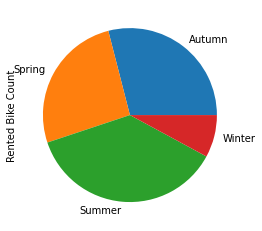

In [19]:
# It give us pie chart of all the count of the rented bikes with respect to the seasons.
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

### Lets plot the number of bikes rented according to the hour of the day:

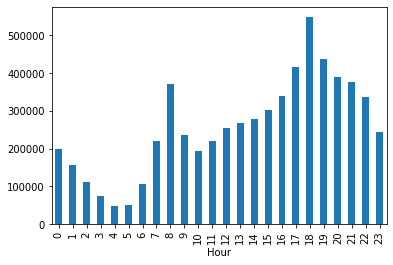

In [20]:
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
plt.rcParams["figure.figsize"] = (10,10)

#### When plotted, We find out that the number of bike riders are most at the times 08:00 in the morning and 06:00 in the evening and in fact the number of riders in the evening are far more than in the evening.

### Plotting The number of riders according to the week of the day

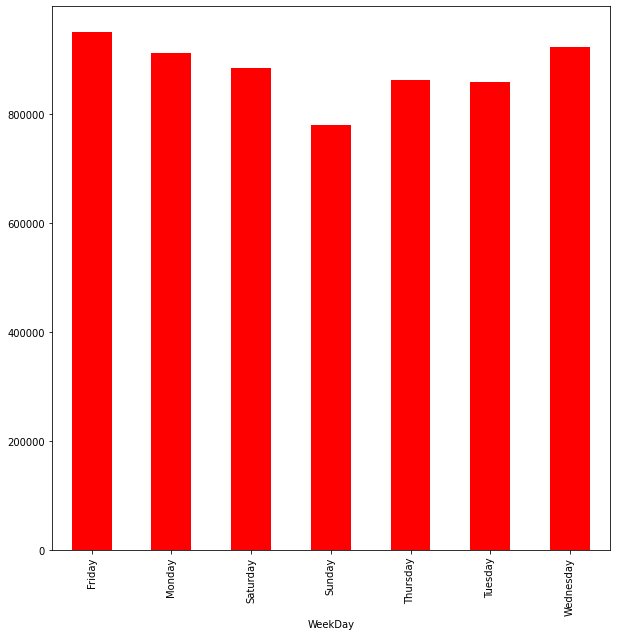

In [21]:
df.groupby('WeekDay').sum()['Rented Bike Count'].plot.bar(color='r')
plt.rcParams["figure.figsize"] = (10,10)

#### As can be inferred from the plot, "Sundays" are the days which has the least number of bikes ridden on a day and the maximum number of days being the "Friday".

In [22]:
df1VizDays=pd.DataFrame(df.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


### Lets Find out what is the sweet spot of temperature in which the riders find it convinient to ride a bike

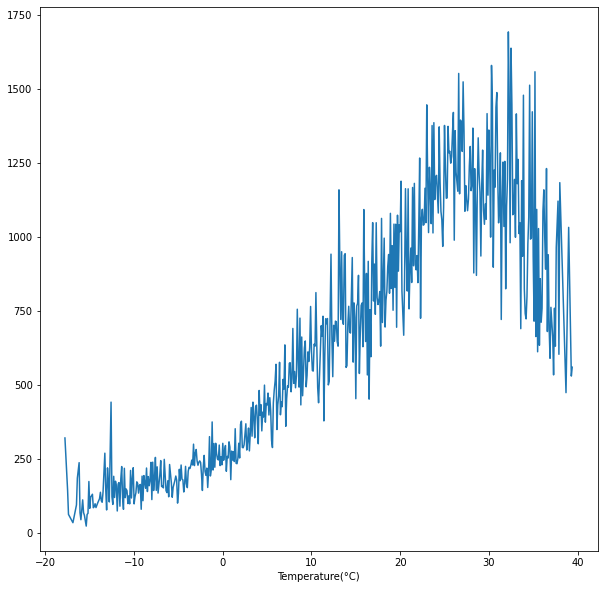

In [23]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

#### So, Riders find it easy and convinient to ride in temperatures ranging 25 to 30 degree Celsius

### Lets see what part of the day do the riders find it amusing to ride that is day or night.

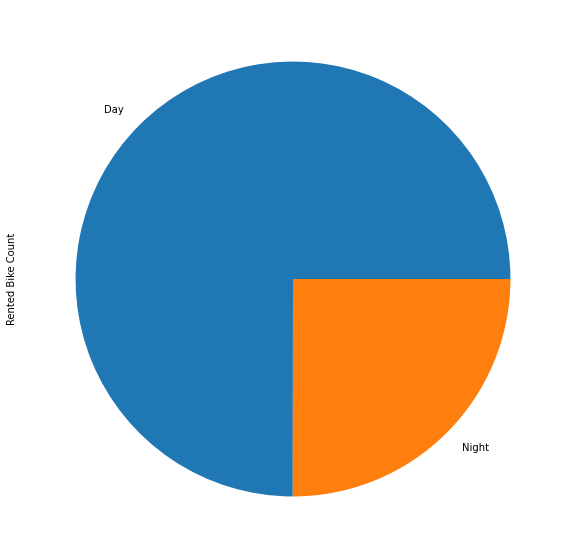

In [24]:
df.groupby('day_or_night').sum()['Rented Bike Count'].plot.pie()

#### So there are more than 75 % of the rides happen in the day and the remaining are in the night.

### Let's see when are more rides taken, on holidays or non-holidays. Although it's fairly simple that , more rides would be taken on non-holidays as more people would use bikes to commute to their offices and very less on holidays.

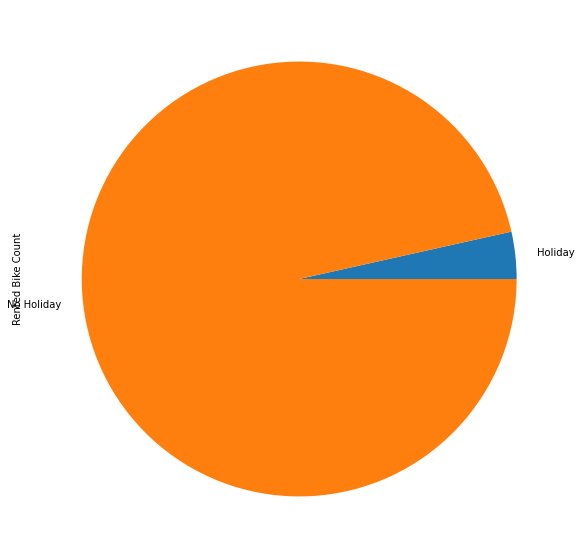

In [25]:
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=1)

#### So, it is inferred  that most number of rides are taken on non-holidays

### Let's plot the rent of bikes following the state of the weather


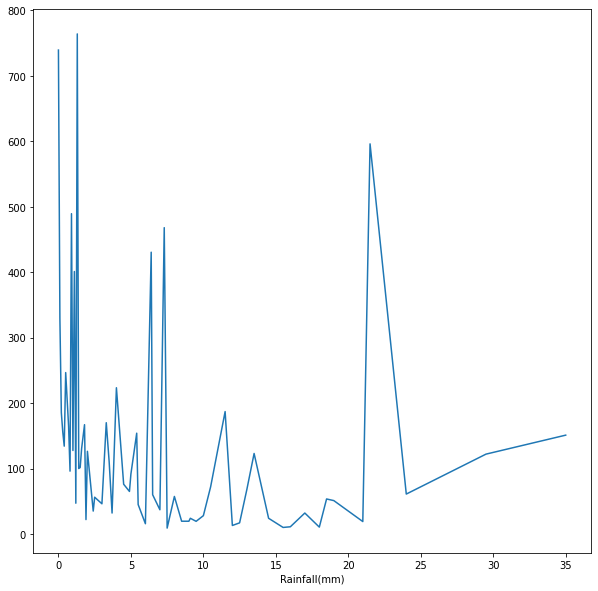

In [26]:
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

#### As it can be inferred, most of the people like riding when there is absolute to  nill Rainfall. But, we see a slight increase in the number of riders when there is rainfall of about 20mm, Which is contradictory.

### Let's see if people like to ride in snowfall?

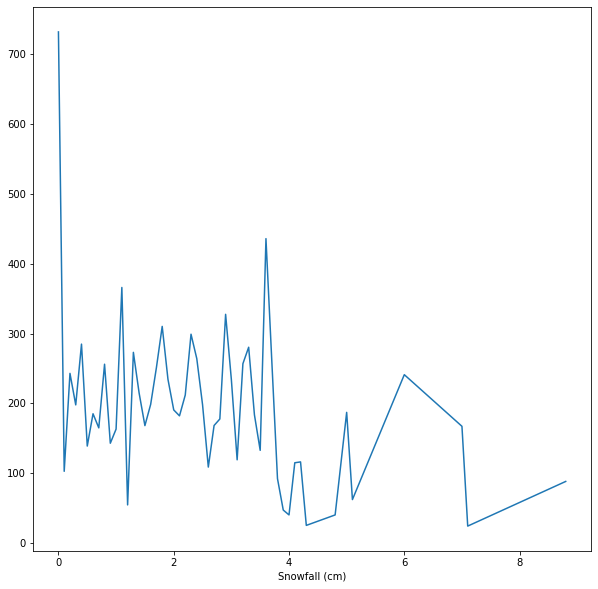

In [27]:
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

#### As Expected, People like riding in very less snowfall.

## Step 2: **Data Modelling**

### Let's import libraries needed in Data Modelling


In [28]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


### Let's split the data into Train and test datasets.


In [29]:
X=df.drop(columns=['Rented Bike Count','Date','Seasons','Holiday','day_or_night','Functioning Day','WeekDay'],axis =1)
y=df.iloc[:,1]
# Y is the target that is 'Rented Bike Count'

In [30]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12


### The variable X contains all the features that would be used in modelling i.e all the independent variables , the Variable Y contains the dependent varible " Rented bike Counter"

### As the Dependent varible contains continous values, We will be using regression Algorithms, which will be

*   Multiple Regression
*   Lasso Regression
*   Ridge Regression
*   Decision Tree regression
*   Random Forest regression
*   Extra tree regressor









## 1. Multiple Linear Regression

#### Let's continue with the Train test Split:

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y)


In [32]:
model_lr=linear_model.LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [33]:
model_lr.intercept_

409.8001338810827

In [34]:
model_lr.coef_

array([ 2.81582603e+01,  3.13003930e+01, -7.81335095e+00,  8.56262265e+00,
        1.03041649e-02, -8.58706819e+01, -6.17156552e+01,  1.14094489e+01,
        7.42477720e+00])

### By printing the coefficients we come to know that the variable 'Temperature" is the one variabke that contributes the most in the equation

### Let's print out the r2 scores of this algorithm

In [35]:
pred_train=model_lr.predict(X_train)

In [36]:
pred_test=model_lr.predict(X_test)

In [37]:
Train_r2=r2_score(y_train,pred_train)
Test_r2=r2_score(y_test,pred_test)

In [38]:
print("The Multiple Linear Regression accuracy score for train is {} and for test is {}".format(Train_r2,Test_r2))

The Multiple Linear Regression accuracy score for train is 0.4771246033304377 and for test is 0.4555376570949956


### As we can incur that R2 scores for training and testing are around 47%, Which is not ideal and hence we move on to other models.

## 2. Ridge regression

#### The main idea begin Ridge Regression is to find a new line that doesn't fit the training data. Ridge regression can provide better long term regression. The goal of the regularization parameter alpha is to reduce the variation Ridge regression is interesting when we have only very interesting features on the dataset.

#### Let's use a GridSearch cv method to implement Ridge regression

In [39]:
ridge=Ridge()
parameters={'alpha':list(range(-300,300))}

gridSearchRidge=GridSearchCV(ridge,parameters,scoring='r2',cv=3)
gridSearchRidge.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [40]:
best_ridge_score=gridSearchRidge.best_estimator_
best_ridge_test_Score=best_ridge_score.score(X_test,y_test)


In [41]:
print('The best R2 train score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(gridSearchRidge.best_score_,gridSearchRidge.best_params_['alpha']))

The best R2 train score is : 0.48
 with Alpha = 28.00
 


In [42]:
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(best_ridge_test_Score,gridSearchRidge.best_params_['alpha']))

The best R2 test score is : 0.46
 with Alpha = 28.00
 


### So, The R2 Scores for train and test come to about 47% which is not ideal and hence we move on to next model which will be Lasso Regression.

## 3. Lasso Regression

#### Lasso regression is a little bit different from Ridge regression. When lambda=0, the lasso regression is the same as the least squares line, when lambda increases, the slope gets smaller. Unlike RIdge regression, Lasso can exclude useless features from the model because it reduce variance.

In [43]:
lasso=Lasso()
parameters={'alpha':list(range(-300,300))}

gridSearchLasso=GridSearchCV(lasso,parameters,scoring='r2',cv=3)
gridSearchLasso.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+09, tolerance: 1.806e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e+09, tolerance: 1.839e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [44]:
print('The best R2 train score is : {:.2f} with Alpha = {:.2f}\n \
'.format(gridSearchLasso.best_score_,gridSearchLasso.best_params_['alpha']))

The best R2 train score is : 0.48 with Alpha = 0.00
 


In [45]:
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(gridSearchLasso.best_score_,gridSearchLasso.best_params_['alpha']))

The best R2 test score is : 0.48
 with Alpha = 0.00
 


### So, As we can see the R2 scores for Lasso are also around 47% with an alpha of 1, and hence we can move on to next algorithms.


## 4.Decision Tree Regressor

In [46]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)

In [47]:
DT = DecisionTreeRegressor()

parameters = {'max_depth' : list(range(0,20))}

gridSearch_decisionTree=GridSearchCV(DT,parameters,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train_Scaled,y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test_Scaled,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than 

In [48]:
print('The best Decision Tree R2 score is : {:.2f} with max depth = {:.2f} \n \
'.format(gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_['max_depth'] ))

The best Decision Tree R2 score is : 0.71 with max depth = 8.00 
 


In [49]:
print('The best R2 test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_decisionTree.best_params_['max_depth']))

The best R2 test score is : 0.65
 with max depth = 8.00
 


### So, The R2 Score for decision tree is around 69% which is better than multiple linear regressions. Finally lets conclude with some more Algorithms.

## 5. Random Forest Regressor

In [57]:
RF = RandomForestRegressor()


parameters_RF = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=100, num=10)], 
         'max_depth' : [60,70,80,90,100],
         'min_samples_split':[2,4,6,8],
         'min_samples_leaf':[1,2,3,4],
         'bootstrap' : [True,False]
        }
        
gridSearch_RF=GridSearchCV(RF,parameters_RF,scoring='r2',cv=5)
gridSearch_RF.fit(X_train_Scaled,y_train)

best_randomForest=gridSearch_RF.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test_Scaled,y_test)

In [59]:
print('The best Random Forest R2 train score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_RF.best_score_,gridSearch_RF.best_params_['n_estimators'],gridSearch_RF.best_params_['max_depth'],gridSearch_RF.best_params_['min_samples_split'],gridSearch_RF.best_params_['min_samples_leaf'] ))

The best Random Forest R2 train score is : 0.79 with n estimators = 100.00, max depth : 100.00, min samples split : 2 and min samples leaf : 1  
 


In [61]:
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestRandomForest_testScore,gridSearch_RF.best_params_['n_estimators'],gridSearch_RF.best_params_['max_depth'],gridSearch_RF.best_params_['min_samples_split'],gridSearch_RF.best_params_['min_samples_leaf'] ))

The best Random Forest R2 test score is : 0.75 with n estimators = 100.00, max depth : 100.00, min samples split : 2 and min samples leaf : 1  
 


### So, It can be seen that the train R2 scores are around 79% and Test scores is around 75% which is better than all our previous models .

## 6.Extra Trees Regressor

In [67]:
ETR = ExtraTreesRegressor()

parameters_ETR = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=170, num=10)], 
         'max_depth' : [50,60,70,80,90,100],
         'min_samples_split':[1,2,4,6,8],
         'min_samples_leaf':[1,2,3,4],
         'bootstrap' : [True,False]
        }

gridSearch_ET=GridSearchCV(ETR,parameters_ETR,scoring='r2',cv=5)
gridSearch_ET.fit(X_train_Scaled,y_train)

best_ET=gridSearch_ET.best_estimator_
bestExtrasTrees_testScore=best_ET.score(X_test_Scaled,y_test)

In [68]:
print('The best Random Forest R2 score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_ET.best_score_,gridSearch_ET.best_params_['n_estimators'],gridSearch_ET.best_params_['max_depth'],gridSearch_ET.best_params_['min_samples_split'],gridSearch_ET.best_params_['min_samples_leaf'] ))

The best Random Forest R2 score is : 0.80 with n estimators = 180.00, max depth : 80.00, min samples split : 2 and min samples leaf : 1  
 


In [70]:
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestExtrasTrees_testScore,gridSearch_ET.best_params_['n_estimators'],gridSearch_ET.best_params_['max_depth'],gridSearch_ET.best_params_['min_samples_split'],gridSearch_ET.best_params_['min_samples_leaf'] ))

The best Random Forest R2 test score is : 0.76 with n estimators = 180.00, max depth : 80.00, min samples split : 2 and min samples leaf : 1  
 


### So, The R2 scores for Train Dataset is around 80% and the test scores are around 76% , Which is better than Random Forest Regressor.

## Finally We see that R2 Scores for train and Test is the best for the Extra Trees Regressor. 
## So for the final modelling of this project, we would like to finalize on Extra Trees Regressor as our final Algorithm.